# Data Analytics Primer for AI & Machine Learning

In [ ]:
import pandas as pd
import numpy as np
from typing import Union
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset 1: States and Union Territories in India: Dataset

In [ ]:
df = pd.read_csv("datasets/States_and_union_territories_of_India_1.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/States_and_union_territories_of_India_1.csv'

## Summary Stats Function

This is a helpful function to continually use throughout your data cleaning process as a 'status report'

In [ ]:
def summary_stats(df) -> pd.DataFrame:

    # Create base frame
    stats = pd.DataFrame(index=df.columns)

    stats["dtype"] = df.dtypes


    stats["sample_val"] = [df[col].dropna().sample(1).iloc[0]
                            if df[col].notna().any() else np.nan
                            for col in df.columns]

    stats["vals"] = df.count()
    stats["miss_pct"] = (df.isna().sum() / len(df) * 100).round(1)
    stats["unique"] = df.nunique()

    # Initiate Descriptive Stats
    for col in ["mean", "mode", "min", "max", "std", "skew", "kurtosis"]:
        stats[col] = np.nan

    # Compute stats for numeric columns
    num_cols = df.select_dtypes(include="number").columns

    for col in num_cols:
        s = df[col].dropna()
        if not s.empty:
            stats.at[col, "mean"] = s.mean()
            stats.at[col, "min"] = s.min()
            stats.at[col, "max"] = s.max()
            stats.at[col, "std"] = s.std()
            stats.at[col, "skew"] = s.skew().round(1)
            stats.at[col, "kurtosis"] = s.kurtosis().round(1)
            mode_vals = s.mode()
            stats.at[col, "mode"] = mode_vals.iloc[0] if not mode_vals.empty else np.nan

    # Rounding preferences for numeric stats (change this to suit dataset)
    round_cols = ["mean", "mode", "min", "max", "std"]
    stats[round_cols] = stats[round_cols].round(2)

    return stats


In [ ]:
#summary_stats(df)

## Column names
Column names need to be cleaned up for several reasons namely:
1. easier to analyse
2. future use or storage i.e. databases or models
3. naming conventions are a good habit


### Option 1: Data Cleanse Function

This is a helpful function to get your columns and rows in a good place before you start any analytics or cleaning

In [ ]:
def data_cleanse(df) -> pd.DataFrame:
    df = df.copy()

    # Normalize column names
    df.columns = (df.columns
                  # Remove special characters
                  .str.replace(r'[^\w\s-]', '', regex=True)
                  # General
                  .str.replace(r'[\n\s]+', '_', regex=True)
                  # Consistency
                  .str.lower())

    # Normalize object values (strings)
    for col in df.select_dtypes(include=['object']):
        # Consistency and remove surprises
        df[col] = df[col].str.strip().str.lower()

    return df

df = data_cleanse(df)

### Option 2

In [ ]:
# Remove characters i.e. (2011) or (km2)
df.columns = df.columns.str.replace(r'[\(\)]+', '', regex=True)

# Replace space and \n with underscore --> good habit
df.columns = df.columns.str.replace(r'[\n\s]+', '_', regex=True).str.lower()


### Renaming

Depending on the situation, you may wish to rename certain columns

In [ ]:
df.rename(columns={'additional_official_languages': 'other_languages',}, inplace=True)

In [ ]:
#summary_stats(df)

,dtype,sample_val,vals,miss_pct,unique,mean,mode,min,max,std,skew,kurtosis
state,object,gujarat,29,0.0,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iso,object,in-ap,28,3.4,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicle_code,object,gj,28,3.4,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zone,object,southern,28,3.4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital,object,agartala,28,3.4,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
largest_city,object,jaipur,28,3.4,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statehood,object,21 january 1972,28,3.4,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population_2011,object,"1,978,502",29,0.0,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_km2,object,"22,327",29,0.0,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
official_languages,object,telugu,28,3.4,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data types
You should always expect your data to be in the wrong data type.

For example, **CSV files do not inherently store data types.**

All future steps in machine learning projects will expect the data in numerical or temporal data.

### Option 1: Convert Data types Function

This is a manual function (you can automate it if you wish) to convert data types.

Key assumption: you have analysed the column values and cleaned/removed anything that might cause it to fail

If the fix is simple, you can always add it in the function (see 'convert columns to integers' below)

In [ ]:
def convert_dtypes(df) -> pd.DataFrame:
    df = df.copy()

    # Convert these columns into integers for analysis and future modeling
    for col in ["population_2011", "area_km2"]:
        df[col] = df[col].str.replace(',', '').astype(int)

    # Convert this column into date time for temporal analysis
    df["statehood"] = pd.to_datetime(df["statehood"], format="%d %B %Y")

    # Convert this column to categorical for classification analysis
    df["zone"] = df["zone"].astype('category')

    return df

In [ ]:
df = convert_dtypes(df)

### Option 2

In [ ]:
# Remove character ',' in columns "population_2011", "area_km2", strip, and make dtype as int
for col in ["population_2011", "area_km2"]:
    df[col] = df[col].str.replace(',', '').astype(int)

# Convert values in column statehood into datetime format e.g. 9 November 2000
df["statehood"] = pd.to_datetime(df["statehood"], format="%d %B %Y")

In [ ]:
# Convert values in column statehood into datetime format e.g. 9 November 2000
df["statehood"] = pd.to_datetime(df["statehood"], format="%d %B %Y")


In [ ]:
summary_stats(df)

,dtype,sample_val,vals,miss_pct,unique,mean,mode,min,max,std,skew,kurtosis
state,object,mizoram,29,0.0,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iso,object,in-od,28,3.4,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicle_code,object,ga,28,3.4,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zone,category,southern,28,3.4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital,object,dispur,28,3.4,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
largest_city,object,ahmedabad,28,3.4,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statehood,datetime64[ns],1987-05-30 00:00:00,28,3.4,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population_2011,int64,1097206,29,0.0,29,81262780.76,610577.0,610577.0,1.178310e+09,2.156451e+08,5.0,26.3
area_km2,int64,21081,29,0.0,29,210625.24,3702.0,3702.0,3.054066e+06,5.551564e+05,5.1,27.1
official_languages,object,marathi,28,3.4,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Data (done badly)

NaN is nice to have but don't expect your missing data to always be so obvious.



### Other Missing Data Function

In [ ]:
def other_missing_data_stats(df) -> pd.DataFrame:
    missing_values = ["?", "—", "n/a", "null", ""]

    stats = pd.DataFrame(index=df.columns)
    stats["total_rows"] = len(df)
    stats["bad_values"] = [df[col].isin(missing_values).sum() for col in df.columns]
    stats["miss_pct"] = (stats["bad_values"] / len(df) * 100).round(2)
    stats["unique"] = df.nunique()

    return stats # Only show columns with issues

In [ ]:
# Example bad tokens
other_missing_values = ["?", "—", "N/A", "null", ""]

def other_missing_data_stats(df, other_missing_values) -> pd.DataFrame:
    stats = {}
    for col in df.columns:
        counts = df[col].isin(other_missing_values).sum()
        stats[col] = {
            "total_rows": len(df),
            "bad_values": counts,
            "miss_pct": round(counts / len(df) * 100, 2),
            "unique": df[col].nunique()
        }
    return pd.DataFrame(stats).T


In [ ]:
other_missing_data_stats(df)

,total_rows,bad_values,bad_percent,unique_values
state,29.0,0.0,0.00,29.0
iso,29.0,0.0,0.00,28.0
vehicle_code,29.0,0.0,0.00,28.0
zone,29.0,0.0,0.00,6.0
capital,29.0,0.0,0.00,27.0
largest_city,29.0,0.0,0.00,28.0
statehood,29.0,0.0,0.00,14.0
population_2011,29.0,0.0,0.00,29.0
area_km2,29.0,0.0,0.00,29.0
official_languages,29.0,0.0,0.00,17.0


In [ ]:
#replace bad_tokens in additional_official_languages with numpy Nan
df["other_languages"] = df["other_languages"].replace(bad_tokens, np.nan)

## Detecting Outliers

In [ ]:
def anomaly_detection(df, z_thresh=3):
    # Select numeric columns
    continuous_cols = df.select_dtypes(include="number").columns.tolist()

    # --- Boxplot ---
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[continuous_cols])
    plt.title("Distribution of Continuous Variables", fontsize=16)
    plt.xlabel("Numeric Columns")
    plt.ylabel("Value Distribution")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # --- Z-score based detection ---
    z_scores = (df[continuous_cols] - df[continuous_cols].mean()) / df[continuous_cols].std()
    outliers = (z_scores.abs() > z_thresh).any(axis=1)
    outlier_rows = df.loc[outliers]

    if outlier_rows.empty:
        print(f"No potential outliers detected with Z-score threshold {z_thresh}.")
    else:
        print(f"Potential outliers detected (Z-score > {z_thresh}):")
        display(outlier_rows)


### Box Plot Visual

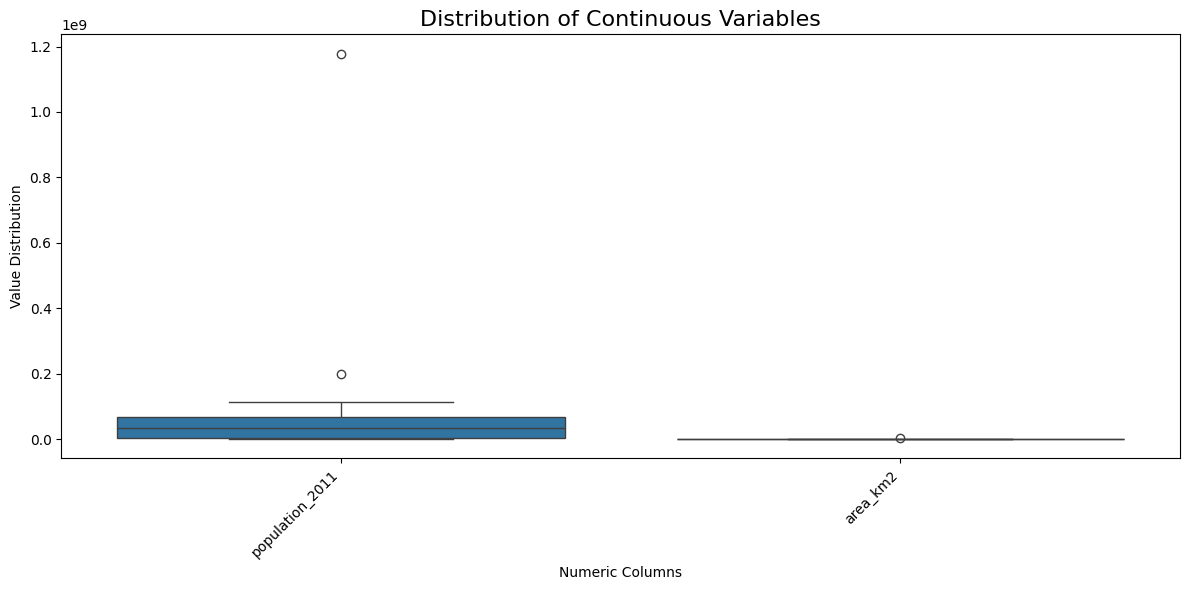

Potential outliers detected (Z-score > 3):


,state,iso,vehicle_code,zone,capital,largest_city,statehood,population_2011,area_km2,official_languages,other_languages
28,total,NaN,NaN,NaN,NaN,NaN,NaT,1178310321,3054066,NaN,NaN


In [ ]:
anomaly_detection(df)

### Option 1: Z-score threshold removal function

In [ ]:
def remove_outliers_by_zscore(df, threshold=3) -> pd.DataFrame:
    df = df.copy()

    # Calculate z-scores for numeric columns
    num_cols = df.select_dtypes(include='number').columns
    z_scores = (df[num_cols] - df[num_cols].mean()) / df[num_cols].std()

    # Filter rows where all z-scores are within threshold
    original_len = len(df)
    df = df[(z_scores.abs() <= threshold).all(axis=1)]

    print(f"Removed {original_len - len(df)} outlier rows ({((original_len - len(df)) / original_len * 100):.1f}%)")

    return df

df = remove_outliers_by_zscore(df)

### Option 2

In [ ]:
# Calculate Z-scores for numeric columns
continuous_cols = df.select_dtypes(include="number").columns
z_scores = (df[continuous_cols] - df[continuous_cols].mean()) / df[continuous_cols].std()

# Remove Outliers where only rows have Z-scores <= 3
df = df[(z_scores.abs() <= 3).all(axis=1)]


In [ ]:
summary_stats(df)

,dtype,sample_val,vals,miss_pct,unique,mean,mode,min,max,std,skew,kurtosis
state,object,manipur,28,0.0,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iso,object,in-hr,28,0.0,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicle_code,object,tn,28,0.0,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zone,category,north-eastern,28,0.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital,object,itanagar,28,0.0,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
largest_city,object,bhubaneswar,28,0.0,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statehood,datetime64[ns],1950-01-26 00:00:00,28,0.0,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population_2011,int64,6864602,28,0.0,28,42082511.46,610577.0,610577.0,199812341.0,45371794.38,1.8,4.2
area_km2,int64,162975,28,0.0,28,109073.79,3702.0,3702.0,342239.0,97306.29,1.1,0.3
official_languages,object,"gujarati, hindi",28,0.0,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Feature Engineering

Use Regular Expressions to identify, remove etc. strings from a larger string or text. There are many use cases so get practising!

https://regexr.com/

Note: \ is a special character in regex to indicate the next character is literal e.g. \. means decimal point or stop whereas . is a regex expression that represents a match of 0 or more

In [ ]:
def split_capital_column(df) -> pd.DataFrame:
    df = df.copy()

    df["capital_winter"] = df["capital"].str.extract(r"\(summer\)\n(.*)\(winter\)")
    df["capital_summer"] = df["capital"].str.extract(r"(.*)\(summer\)")
    df["capital"] = np.where(
        pd.notna(df["capital_summer"]) | pd.notna(df["capital_winter"]),
        np.nan,
        df["capital"]
    )

    return df

In [ ]:
df = split_capital_column(df)

### Domain Expertise - sanity checks

Important step to get a sense if anything is 'amiss'

In [ ]:
langs = []

for _, row in df.iterrows():
    if pd.notna(row["official_languages"]):
        langs.extend(row["official_languages"].split(", "))
    if pd.notna(row["other_languages"]):
        langs.extend(row["other_languages"].split(", "))

unique_languages = set(langs)


In [ ]:
num_unique_languages = len(unique_languages)
print(f"Number of unique languages: {num_unique_languages}")

Number of unique languages: 46


In [ ]:
cities = []

for _, row in df.iterrows():
    if pd.notna(row["capital"]):
        cities.extend(row["capital"].split(", "))
    if pd.notna(row["capital_winter"]):
        cities.extend(row["capital_winter"].split(", "))
    if pd.notna(row["capital_summer"]):
        cities.extend(row["capital_summer"].split(", "))

unique_cities = list(set(cities))


In [ ]:
num_unique_cities = len(unique_cities)
print(f"Number of unique cities: {num_unique_cities}")
print(sorted(unique_cities))

Number of unique cities: 30
['agartala', 'aizawl', 'amaravati', 'bengaluru', 'bhararisain ', 'bhopal', 'bhubaneswar', 'chandigarh', 'chennai', 'dehradun ', 'dharamshala ', 'dispur', 'gandhinagar', 'gangtok', 'hyderabad', 'imphal', 'itanagar', 'jaipur', 'kohima', 'kolkata', 'lucknow', 'mumbai ', 'nagpur ', 'panaji', 'patna', 'raipur', 'ranchi', 'shillong', 'shimla ', 'thiruvananthapuram']


# Dataset 2: Assignment 4.3

In [ ]:
df = pd.read_csv("datasets/sparql_2021-11-03_13-04-38Z.csv")

## Missing Completely at Random or not?
If < 20% missing data in a column, check first to see if it's random:

Missing Completely at Random (MCAR) is most simple/common assumption --> use mean, median
- This is a bad technique to be used if the dataset contains outliers.

Missing At Random (MAR) likelihood data is missing is 'conditionally' tied to some other missing data point

Missing not at Random (MNAR)







### Problem 1: See Missing Data

Using summary_stats function can help you get a quick sense of what is Missing data (NaN)

In [ ]:
#summary_stats(df)

### Problem 2-4: Imputing Missing Data ('name' column)

We find that we can fill missing values using name

ans4 = df['a'].str.split('/').apply(lambda x: x[-1])

Some things to consider:
1. Is there a pattern we can quickly strip out to see the data more clearly
2. Is the data missing completely at random or not?
3. Is there a way of extracting data for consistent analytics?

In [ ]:
#1. Is there a pattern we can quickly strip out to see the data more clearly

# Observation: one regex can strip out a lot of noise from the rows
df = df.replace(r'^http://dbpedia.org/resource/', '', regex=True)

### MCAR or MNAR
Before deciding on imputation techniques, consider if the missing data is MCAR, MAR, or MNAR

There can be benefits of discovering it's MNAR, as is in this example

In [ ]:
# 2. Is the data MCAR or MNAR?
missing_name = df.loc[df['name'].isnull()]
unique_a_values = set(missing_name['a'].unique())
num_unique_a_values = len(unique_a_values)

In [ ]:
print(f"Of 250 possible 'a' values, {num_unique_a_values} account for all missing 'name' values\n")
print(f"Unique 'a' values: {unique_a_values}")

# The data is not missing completely at random!

Of 250 possible 'a' values, 4 account for all missing 'name' values

Unique 'a' values: {'FirstMerit_Corporation', 'Bulgarian_Postbank', 'Royal_Canadian_Mint', 'Coventry_Health_Care'}


#### MNAR Example: Bulgarian_Postbank

Currently, Bulgarian_Postbank has two corresponding entries in 'name' column:
 "Bulgarian Postbank" and "(legally known as Eurobank Bulgaria AD)"

If we impute missing 'name' values using data from the 'a' column, then Bulgarian_Postbank will have three corresponding entries in 'name' column
- ans4 = df['a'].str.split('/').apply(lambda x: x[-1]) we add a 3rd name: "Bulgarian_Postbank"

Also, through our analysis we have identified another problem, potentially worse than missing data - human entry error
- is keeping '(legally known as Eurobank Bulgaria AD)' better or worse than missing data?


In [ ]:
#df.loc[df['a'] == 'Bulgarian_Postbank']


In [ ]:
# Alternative solution: renaming all 'name' values to Bulgarian Postbank fixes both issues

#if column 'a' value == 'Bulgarian_Postbank' then name == 'Bulgarian Postbank'
df.loc[df['a'] == 'Bulgarian_Postbank', 'name'] = 'Bulgarian Postbank'

df.loc[df['a'] == 'Bulgarian_Postbank']


,a,name,type,foundation,location,products,sector,employee,assets,equity,revenue,profit
4861,Bulgarian_Postbank,Bulgarian Postbank,Commercial_bank,1991,Bulgaria,Asset_management,Financial_services,3000,6.82E+09,1.15E+09,3.05E+08,1.20E+08
4862,Bulgarian_Postbank,Bulgarian Postbank,Commercial_bank,1991,Bulgaria,Factoring_(finance),Financial_services,3000,6.82E+09,1.15E+09,3.05E+08,1.20E+08
4863,Bulgarian_Postbank,Bulgarian Postbank,Commercial_bank,1991,Bulgaria,Investment_banking,Financial_services,3000,6.82E+09,1.15E+09,3.05E+08,1.20E+08
4864,Bulgarian_Postbank,Bulgarian Postbank,Commercial_bank,1991,Bulgaria,Retail_banking,Financial_services,3000,6.82E+09,1.15E+09,3.05E+08,1.20E+08
4865,Bulgarian_Postbank,Bulgarian Postbank,Commercial_bank,1991,Bulgaria,Corporate_banking,Financial_services,3000,6.82E+09,1.15E+09,3.05E+08,1.20E+08
4866,Bulgarian_Postbank,Bulgarian Postbank,Commercial_bank,1991,Bulgaria,Loans,Financial_services,3000,6.82E+09,1.15E+09,3.05E+08,1.20E+08
4867,Bulgarian_Postbank,Bulgarian Postbank,Commercial_bank,1991,Bulgaria,Asset_management,Financial_services,3000,6.82E+09,1.15E+09,3.05E+08,1.20E+08
4868,Bulgarian_Postbank,Bulgarian Postbank,Commercial_bank,1991,Bulgaria,Factoring_(finance),Financial_services,3000,6.82E+09,1.15E+09,3.05E+08,1.20E+08
4869,Bulgarian_Postbank,Bulgarian Postbank,Commercial_bank,1991,Bulgaria,Investment_banking,Financial_services,3000,6.82E+09,1.15E+09,3.05E+08,1.20E+08
4870,Bulgarian_Postbank,Bulgarian Postbank,Commercial_bank,1991,Bulgaria,Retail_banking,Financial_services,3000,6.82E+09,1.15E+09,3.05E+08,1.20E+08


### Problem 7: Missing Values in 'location'

When imputing data from other columns, we assume the reliability of data in that column.

Go through the process of analysing the column dataset before you make any decision.

In [ ]:
#show df column 'name' where data is missing
missing_location = df.loc[df['location'].isnull()]

# Is the data missing completely at random or not?
unique_a_values = set(missing_location['a'].unique())
num_unique_a_values = len(unique_a_values)

print(f"Of 250 possible 'a' values, {num_unique_a_values} account for all missing 'location' values\n")

print(f"Unique 'a' values: {unique_a_values}")
# The data is not missing completely at random!


Of 250 possible 'a' values, 9 account for all missing 'location' values

Unique 'a' values: {'NCSoft', 'Lazard', 'Ansys', 'Analog_Devices', 'Nuance_Communications', 'Dialog_Axiata', 'Gannett', 'Petron_Corporation', 'Amgen'}




Often data is not missing completely at random. Quick analysis (and thinking!) can set you and your dataset up for success later...

Considerations with replacing missing `location` with `foundation` using one of our 9 'a' values e.g. Lazard

- when location is not null, foundation is not the same as location
- when location is not null, naming convention of foundation is not the same as location
- when location is...wait a second, what is actually in `foundation`?

### Missing v Incorrect Data

Key assumption is that `foundation` contains location data. We don't necessarily know what location data is but we do know what *it isn't*

Location Data is not:
1. Integers (note: geolocation would be a float)
2. Dates (note: use a regex convention)
3. One character (note: could be two if state e.g. "CA" or country "US")

In [ ]:
def clean_foundation_column(df) -> pd.DataFrame:
    df = df.copy()

    # Track changes
    original_count = df["foundation"].notna().sum()
    changes = {"dates": 0, "numbers": 0}

    # Strip whitespace
    df["foundation"] = df["foundation"].str.strip()

    # Detect and replace pure numbers
    numeric_mask = df["foundation"].str.match(r'^\d+$', na=False)
    changes["numbers"] = numeric_mask.sum()

    # Detect and replace date patterns (m/d/yyyy, mm/dd/yyyy, etc.)
    date_mask = df["foundation"].str.match(r'^\d{1,2}/\d{1,2}/\d{4}$', na=False)
    changes["dates"] = date_mask.sum()

    # Detect 1 character i.e. not a word
    one_char_mask = df["location"].str.len() == 1
    changes["one_char"] = one_char_mask.sum()

    # Replace matched values with NaN
    df.loc[numeric_mask | date_mask | one_char_mask, "foundation"] = np.nan

    # Report changes
    final_count = df["foundation"].notna().sum()
    print(f"Removed {changes['numbers']} numeric values")
    print(f"Removed {changes['dates']} date values")
    print(f"Removed {changes['one_char']} one character values")
    print(f"Total values removed: {original_count - final_count}")

    return df

df = clean_foundation_column(df)

Removed 2570 numeric values
Removed 3869 date values
Removed 368 one character values
Total values removed: 6755


In [ ]:
def clean_location_column(df) -> pd.DataFrame:
    df = df.copy()

    # Track changes
    original_count = df["location"].notna().sum()
    changes = {"dates": 0, "numbers": 0}

    # Strip whitespace
    df["location"] = df["location"].str.strip()

    # Detect and replace pure numbers
    numeric_mask = df["location"].str.match(r'^\d+$', na=False)
    changes["numbers"] = numeric_mask.sum()

    # Detect and replace date patterns (m/d/yyyy, mm/dd/yyyy, etc.)
    date_mask = df["location"].str.match(r'^\d{1,2}/\d{1,2}/\d{4}$', na=False)
    changes["dates"] = date_mask.sum()

    # Detect 1 character i.e. not a word
    one_char_mask = df["location"].str.len() == 1
    changes["one_char"] = one_char_mask.sum()

    # Replace matched values with NaN
    df.loc[numeric_mask | date_mask | one_char_mask, "location"] = np.nan

    # Report changes
    final_count = df["location"].notna().sum()
    print(f"Removed {changes['numbers']} numeric values")
    print(f"Removed {changes['dates']} date values")
    print(f"Removed {changes['one_char']} one character values")
    print(f"Total values removed: {original_count - final_count}")

    return df

df = clean_location_column(df)

Removed 1268 numeric values
Removed 0 date values
Removed 368 one character values
Total values removed: 1280


In [ ]:
summary_stats(df)

,dtype,sample_val,vals,miss_pct,unique,mean,mode,min,max,std,skew,kurtosis
a,object,Ruby_Tuesday_(restaurant),10000,0.0,250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,object,MetaBank,9981,0.2,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,object,Public_company,10000,0.0,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
foundation,object,Luxembourg,2910,70.9,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,object,"Duluth, Georgia, United States",8656,13.4,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
products,object,Cement,9014,9.9,434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sector,object,Financial_services,10000,0.0,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employee,int64,19568,10000,0.0,243,7803.18,827.0,4.0,70100.0,11984.44,2.7,8.2
assets,object,2.42E+10,7103,29.0,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
equity,object,6.49E+09,7124,28.8,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Decision to drop is generally if > 60% missing values in a column.

Sometimes, given the quality and issues with certain columns, you may wish to consider what you are looking to analyse before you go cleaning columns that aren't being used?

e.g. do you need town, state...or is country enough? Think Tax or look at currency of profit etc. to get location!

## Duplicates

Although not predominantly covered, it can be helpful to analyse stats to determine if duplicates have a pattern too.

In [ ]:
def duplicates(df) -> pd.DataFrame:
    df = df.copy()

    # Identify duplicates
    dups = df[df.duplicated(keep=False)]
    dup_count = len(dups)

    if dup_count > 0:
        print(f"Found {dup_count} duplicate records ({len(dups)//2} unique sets)")

    else:
        print("No duplicate records found")

    return dups

duplicate_records = duplicates(df)

### Option 1: Duplicate Stats Function

In [ ]:
def duplicate_stats(df) -> pd.DataFrame:
    stats = pd.DataFrame(index=df.columns)

    stats["total_rows"] = len(df)
    stats["dup_count"] = [df[col].duplicated(keep=False).sum() for col in df.columns]
    stats["dup_pct"] = (stats["dup_count"] / len(df) * 100).round(2)
    stats["unique"] = df.nunique()

    return stats  # Only show columns with duplicates

dup_stats = duplicate_stats(df)


Found 368 duplicate records (184 unique sets)
